In [1]:
from DQN.DQN_agent import Agent
from DQN.model import Model

from shared.memory_manager import MemoryManager
from DQN.train import train


import torch
import torch.optim as optim

from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration

import numpy as np
import matplotlib.pyplot as plt

import os


Loading environment football failed: No module named 'gfootball'


In [2]:
A09 = torch.load("tournament/A09/DQN/model")
state_dict = Model().state_dict()

for key in A09.keys():
    print(key)

for key in state_dict.keys():
    full_key = key
    key = key.split(".")

    if key[0] == "map_preprocessing":
        print("skipped", key)
        continue

    if key[0] == "shared" and key[1] == "0":
        print("skipped", key)
        continue

    print(full_key)
    state_dict[full_key] = A09[full_key]


shared.0.weight
shared.0.bias
shared.2.weight
shared.2.bias
shared.4.weight
shared.4.bias
shared.6.weight
shared.6.bias
shared.8.weight
shared.8.bias
shared.10.weight
shared.10.bias
shared.12.weight
shared.12.bias
values.0.weight
values.0.bias
values.2.weight
values.2.bias
values.4.weight
values.4.bias
advantages.0.weight
advantages.0.bias
advantages.2.weight
advantages.2.bias
advantages.4.weight
advantages.4.bias
skipped ['map_preprocessing', '0', 'weight']
skipped ['map_preprocessing', '0', 'bias']
skipped ['map_preprocessing', '2', 'weight']
skipped ['map_preprocessing', '2', 'bias']
skipped ['map_preprocessing', '4', 'weight']
skipped ['map_preprocessing', '4', 'bias']
skipped ['map_preprocessing', '6', 'weight']
skipped ['map_preprocessing', '6', 'bias']
skipped ['shared', '0', 'weight']
skipped ['shared', '0', 'bias']
shared.2.weight
shared.2.bias
shared.4.weight
shared.4.bias
shared.6.weight
shared.6.bias
shared.8.weight
shared.8.bias
shared.10.weight
shared.10.bias
shared.12.we

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

memory_manager = MemoryManager(500000, 0.99)

model = Model()
model.set_config(Configuration({"columns": 11, "rows": 7}))

model.flipping = True


def epsilon(iteration):
    return 0

def greedy(iteration):
    return 0

agent = Agent(model, epsilon, training_wheels=True)

# opponents = ["main.py", "main.py", "main.py"]
opponents = ["tournament/B02/main.py"] + ["tournament/B03/main.py"] + ["tournament/B04/main.py"]
# opponents = ["greedy"] * 3

env = make("hungry_geese", debug=False)

trainer = env.train([None, *opponents])


cuda


In [4]:
# model.load_state_dict(torch.load("tournament/A6TW/DQN/model"))
model.load_state_dict(torch.load("DQN/model"))
# model.load_state_dict(state_dict)
model.eval()

model.to(device)
model.device = device

#optimizer = optim.SGD(model.parameters(), lr=1e-4)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer.load_state_dict(torch.load("DQN/optimizer"))
# optimizer.load_state_dict(torch.load("backup/5999_optimizer"))


In [5]:
memory_manager.memory = []
memory_manager.memory_position = 0

In [6]:
params = {}
params["sampling_count"] = 1
params["episode_count"] = 1

params["batch_size"] = 1000
params["training_time"] = 20000
params["target_update"] = 0.001

#agent.epsilon = greedy

In [7]:
train(agent, memory_manager, optimizer, device, trainer, params)

Current Iteration 14677/20000, 73.39%, 243:41, Loss: 424.57, place: 1.0/1.72, rewards: 302.88, memory position: 150239, time 672:5

KeyboardInterrupt: 

250


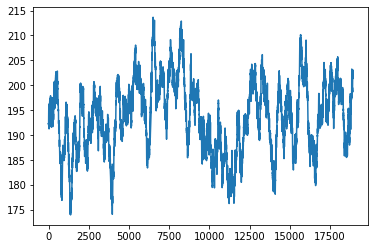

In [8]:
N = int(len(memory_manager.rewards) / 100)
N = 250
print(N)
plt.plot(np.convolve(memory_manager.rewards, np.ones(N)/N, mode='valid'))

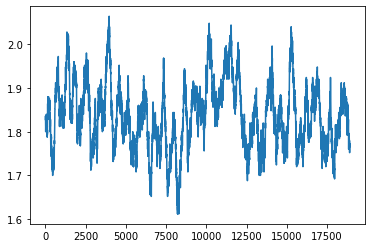

In [9]:
plt.plot(np.convolve(memory_manager.places, np.ones(N)/N, mode='valid'))

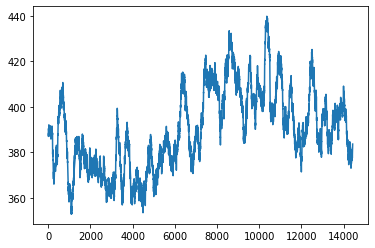

In [10]:
plt.plot(np.convolve(memory_manager.policy_loss, np.ones(N)/N, mode='valid'))

In [11]:
torch.save(agent.model.state_dict(), f"DQN/model")
torch.save(optimizer.state_dict(), f"DQN/optimizer")

!tar -czvf submission.tar.gz main.py DQN/model DQN/DQN_agent.py DQN/model.py shared/map.py


a main.py
a DQN/model
a DQN/DQN_agent.py
a DQN/model.py
a shared/map.py


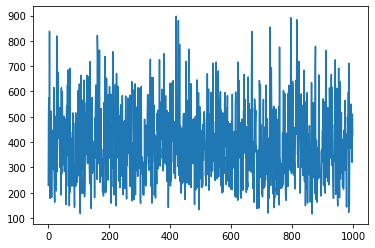

In [12]:
plt.plot(memory_manager.policy_loss[-1000:])